<a href="https://colab.research.google.com/github/umairchanna57/Mahine-Learning-/blob/main/Copy_of_Raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive

In [65]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd

In [67]:
df =pd.read_excel('/content/drive/My Drive/data/data.xlsx')

In [68]:
df.head()

,x,y
0,-0.016479,0.012032
1,-0.016479,0.014321
2,-0.016174,0.012338
3,-0.014038,0.013406
4,0.001526,0.012338


In [69]:
df.loc[: , 'x']

0      -0.016479
1      -0.016479
2      -0.016174
3      -0.014038
4       0.001526
          ...   
2427    0.033569
2428    0.024719
2429    0.014954
2430    0.009155
2431    0.001831
Name: x, Length: 2432, dtype: float64

In [70]:
df.loc[: , 'y']

0       0.012032
1       0.014321
2       0.012338
3       0.013406
4       0.012338
          ...   
2427    0.016152
2428    0.015237
2429    0.013253
2430    0.014932
2431    0.011422
Name: y, Length: 2432, dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2432 non-null   float64
 1   y       2432 non-null   float64
dtypes: float64(2)
memory usage: 38.1 KB


In [72]:
df.describe()

,x,y
count,2432.000000,2432.000000
mean,2.819206,0.084886
std,2.092661,0.051935
min,-0.016785,0.010507
25%,0.766525,0.034272
50%,2.736053,0.083062
75%,4.652863,0.127580
max,7.001038,0.191934


In [73]:
df['x'].isnull().values.any()

False

In [74]:
df['y'].isnull().values.any()

False

In [75]:
df.shape

(2432, 2)

In [76]:
x=df['x']

In [77]:
type(x)

pandas.core.series.Series

In [78]:
df.index

RangeIndex(start=0, stop=2432, step=1)

In [79]:
x.dtype

dtype('float64')

In [80]:
y=df['y']

In [81]:
y.dtype

dtype('float64')

In [82]:
x.iloc[-1]

0.0018310547

In [83]:
y.iloc[-1]

0.0114221191

In [84]:
df[df['x']>1]

,x,y
15,1.137695,0.034310
16,1.314392,0.037362
17,1.501770,0.042703
18,1.697693,0.043466
19,1.900024,0.049417
...,...,...
2388,1.183777,0.048654
2389,1.136475,0.049569
2390,1.090698,0.047738
2391,1.043701,0.045297


Before Drop dupliacte 

In [85]:
df.shape

(2432, 2)

In [86]:

df=df.drop_duplicates()

After Dupliactes But there is no any Duplicate 


In [87]:
df.shape

(2423, 2)

In [88]:
%timeit df.iloc[1, 1]

28.1 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [89]:
import matplotlib.pyplot as plt

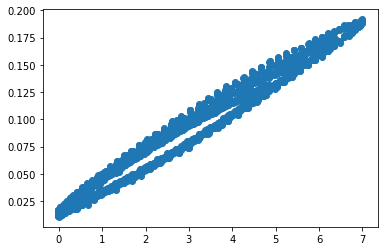

In [90]:
plt.scatter(x,y)

In [91]:
import scipy as sp
import scipy.signal
import os
import numpy as np
import matplotlib.pyplot as plt

In [92]:
df['ret'] = np.log(df['y'] / df['y'].shift(1))

In [93]:
df.head

<bound method NDFrame.head of              x         y       ret
0    -0.016479  0.012032       NaN
1    -0.016479  0.014321  0.174138
2    -0.016174  0.012338 -0.149092
3    -0.014038  0.013406  0.083029
4     0.001526  0.012338 -0.083029
...        ...       ...       ...
2427  0.033569  0.016152  0.088854
2428  0.024719  0.015237 -0.058351
2429  0.014954  0.013253 -0.139478
2430  0.009155  0.014932  0.119245
2431  0.001831  0.011422 -0.267931

[2423 rows x 3 columns]>

In [94]:
length= len(df['ret'])

In [95]:
length

2423

In [96]:
Lam = 0.94

In [97]:
ser= np.arange(length-1 , -1,-1)

In [98]:
ser

array([2422, 2421, 2420, ...,    2,    1,    0])

In [99]:
len(df['ret'].dropna())

2422

In [100]:
exp = np.power(Lam,ser)*(1-Lam)

In [101]:
exp

array([4.94097514e-67, 5.25635653e-67, 5.59186865e-67, ...,
       5.30160000e-02, 5.64000000e-02, 6.00000000e-02])

In [102]:
df['exp'] = exp

In [103]:
df.head()


,x,y,ret,exp
0,-0.016479,0.012032,NaN,4.940975e-67
1,-0.016479,0.014321,0.174138,5.256357e-67
2,-0.016174,0.012338,-0.149092,5.591869e-67
3,-0.014038,0.013406,0.083029,5.948796e-67
4,0.001526,0.012338,-0.083029,6.328507e-67


In [104]:
pro = df['exp'] * df['exp'] **2

In [105]:
pro.sum()

0.0012749681257968575

In [106]:
np.sqrt(pro.sum())*100

3.570669581180619

In [140]:
Lam=0.94
for i in df.columns:
  df['res_' +i] = np.log(df[i]/df[i].shift(1))
  ser=np.arange(length-1, -1,-1)
  exp=np.power(Lam,ser)*(1- Lam)
  pro =np.power(df['res_' +i],2)*exp 
  result=np.sqrt(pro.sum())*50
  print(i,round(result,4))

x 22.4448
y 5.5317
ret inf
exp 3.0938
res_x inf
res_y inf
res_ret inf
res_exp 0.0
res_res_x inf
res_res_y inf
res_res_ret inf
res_res_exp inf
res_res_res_x inf
res_res_res_y inf
res_res_res_ret 0.0
res_res_res_exp 0.0
res_res_res_res_x 0.0212
res_res_res_res_y 0.0
res_res_res_res_ret 0.0
res_res_res_res_exp 0.0
res_res_res_res_res_x 0.0147
res_res_res_res_res_y 0.0
res_res_res_res_res_ret 0.0
res_res_res_res_res_exp 0.0


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [141]:
import matplotlib.pyplot as plt

In [142]:
df.head()

,x,y,ret,exp,res_x,res_y,res_ret,res_exp,res_res_x,res_res_y,...,res_res_res_res_ret,res_res_res_res_exp,res_res_res_res_res_x,res_res_res_res_res_y,res_res_res_res_res_ret,res_res_res_res_res_exp,res_res_res_res_res_res_x,res_res_res_res_res_res_y,res_res_res_res_res_res_ret,res_res_res_res_res_res_exp
0,-0.016479,0.012032,NaN,4.940975e-67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.016479,0.014321,0.174138,5.256357e-67,0.000000,0.174138,NaN,0.061875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.016174,0.012338,-0.149092,5.591869e-67,-0.018692,-0.149092,NaN,0.061875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.014038,0.013406,0.083029,5.948796e-67,-0.141651,0.083029,NaN,0.061875,2.02526,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001526,0.012338,-0.083029,6.328507e-67,NaN,-0.083029,NaN,0.061875,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


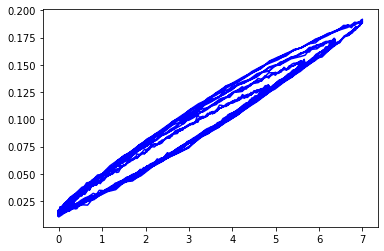

In [143]:
plt.plot(x, y, color='blue', 
      markersize=1)